In [9]:
# How to Compare Models in Machine Learning
# WARNING: Dataset is not processed well for this task, demostration of concept only.

# Importing pandas
import pandas as pd

# Load df
music = pd.read_csv('../../_datasets/music_clean.csv')


In [10]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Seperating features from the target
X = music.drop("genre", axis=1).values
y = music["genre"].values

# Splitting for validation
# Note to split data before you scale or data leakage occurs
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiating scaler
scaler = StandardScaler()

# Scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


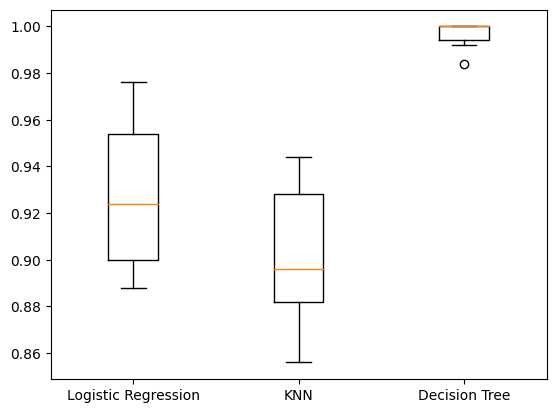

In [11]:
# Models to evaluate with their instantiation
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Empty results list
results = []

# Loop through the dictionary of models and append accuracy results
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)

# Create plot to show models
plt.boxplot(results, labels=models.keys())
plt.show()


In [12]:
# Display accuracy scores of each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))


Logistic Regression Test Set Accuracy: 0.864
KNN Test Set Accuracy: 0.888
Decision Tree Test Set Accuracy: 1.0
